Настройка среды Google Colab

In [1]:
# Подключение Google Drive (опционально, если данные хранятся там)
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

Эта строка монтирует Google Drive в среду Colab, чтобы можно было получить доступ к файлам данных, если они хранятся там.

In [11]:
# Установка необходимых библиотек
!pip install -q tensorflow

Импорт необходимых библиотек

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

Импортируем все необходимые библиотеки:

NumPy и Pandas для работы с данными

Matplotlib и Seaborn для визуализации

TensorFlow/Keras для построения нейронной сети

Scikit-learn для разделения данных и предобработки

Загрузка и подготовка данных

In [13]:
# Загрузка данных (пример с использованием встроенного набора данных)
dataset_path = keras.utils.get_file("auto-mpg.data",
                                   "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(dataset_path, names=column_names,
                         na_values='?', comment='\t',
                         sep=' ', skipinitialspace=True)

Загружаем классический набор данных Auto MPG из репозитория UCI, который содержит информацию о топливной экономичности (мили на галлон - MPG) и различных характеристиках автомобилей.

In [14]:
# Обработка пропущенных значений
dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [15]:
# Преобразование категориальной переменной 'Origin'
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')


In [16]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True


Преобразуем категориальную переменную Origin (страна производства) в one-hot кодировку.

Разделение данных на обучающую и тестовую выборки

In [17]:
# Разделение данных на признаки и целевую переменную
X = dataset.drop('MPG', axis=1)
y = dataset['MPG']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Разделяем данные на:

Признаки (X) - все столбцы кроме MPG

Целевую переменную (y) - MPG (топливная экономичность)
И далее на тренировочную (80%) и тестовую (20%) выборки.

Масштабирование данных

In [18]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Создание модели нейронной сети

In [19]:
# Создание модели
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

model = build_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Создаем модель последовательного типа с:

Входным слоем (размер соответствует количеству признаков)

Двумя скрытыми слоями по 64 нейрона с активацией ReLU

Выходным слоем с 1 нейроном (регрессия)

Компилируем модель с:

Функцией потерь MSE (среднеквадратичная ошибка)

Оптимизатором Adam с learning rate 0.001

Метриками MAE и MSE для мониторинга

Обучение модели

In [20]:
# Обучение модели
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0
)

Обучаем модель на 100 эпохах с:

Размером батча 32

20% данных используются для валидации

verbose=0 для "тихого" обучения (без вывода логов)

Визуализация процесса обучения

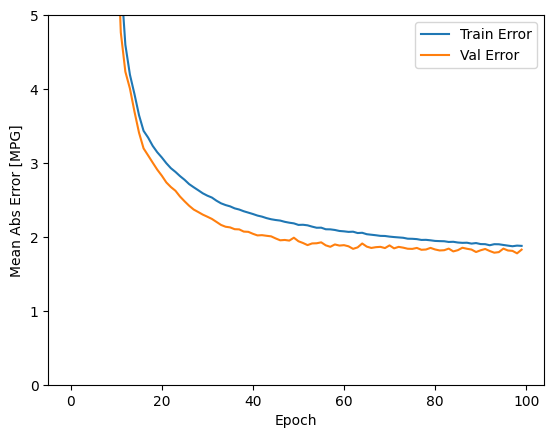

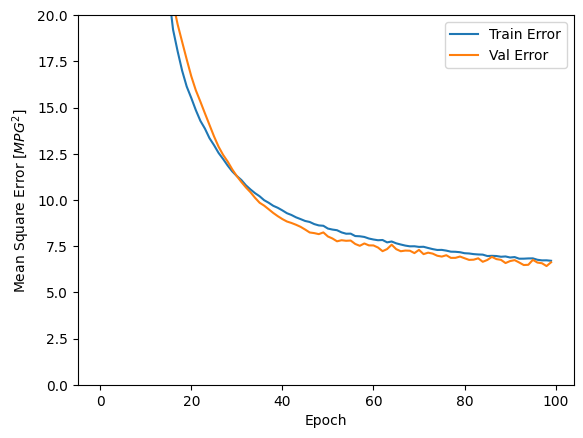

In [21]:
# Функция для визуализации истории обучения
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
    plt.legend()
    plt.ylim([0,5])

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
    plt.legend()
    plt.ylim([0,20])

plot_history(history)

Визуализируем процесс обучения, выводя графики MAE и MSE на тренировочной и валидационной выборках.

Оценка модели на тестовых данных

In [22]:
# Предсказание на тестовых данных
y_pred = model.predict(X_test_scaled).flatten()

# Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Mean Squared Error (MSE): 5.96
Mean Absolute Error (MAE): 1.69


Делаем предсказания на тестовых данных и вычисляем:

MSE (Mean Squared Error) - среднеквадратичную ошибку

MAE (Mean Absolute Error) - среднюю абсолютную ошибку

 Визуализация результатов

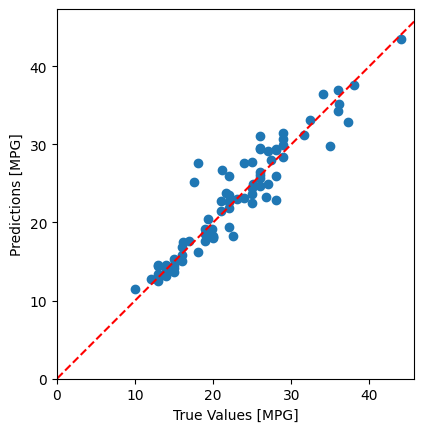

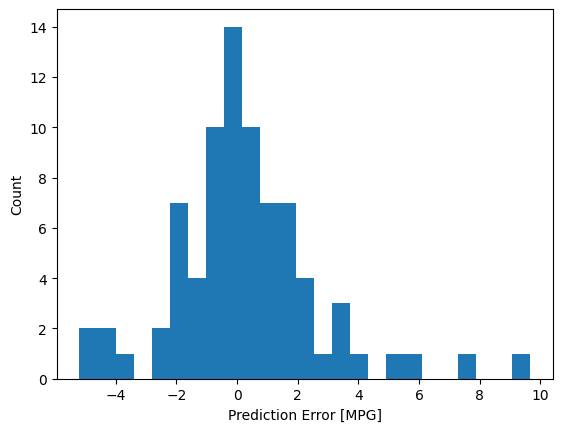

In [23]:
# График предсказаний vs реальных значений
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100], 'r--')
plt.show()

# Гистограмма ошибок
error = y_pred - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
plt.ylabel('Count')
plt.show()